In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [5]:
df = pd.read_csv("train.csv")

In [7]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [9]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [11]:
df.shape

(800, 22)

In [13]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [15]:
pd.set_option('display.max_columns', None)

In [17]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [23]:
df['age'] = df['age'].astype(int)

In [25]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [27]:
for col in df.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, df[col].unique())
        print("--" * 20)

A1_Score [1 0]
----------------------------------------
A2_Score [0 1]
----------------------------------------
A3_Score [1 0]
----------------------------------------
A4_Score [0 1]
----------------------------------------
A5_Score [1 0]
----------------------------------------
A6_Score [0 1]
----------------------------------------
A7_Score [1 0]
----------------------------------------
A8_Score [0 1]
----------------------------------------
A9_Score [1 0]
----------------------------------------
A10_Score [1 0]
----------------------------------------
gender ['f' 'm']
----------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
----------------------------------------
jaundice ['no' 'yes']
----------------------------------------
austim ['no' 'yes']
----------------------------------------
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 '

In [29]:
df = df.drop(columns = ['ID', 'age_desc'])
df.shape

(800, 20)

In [31]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [33]:
mapping = {
    "Viet Nam": "Vietnam", 
    "AmericanSamoa" : "United States", 
    "Hong Kong": "China"
}

df['contry_of_res'] = df['contry_of_res'].replace(mapping)
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [35]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [37]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Age Mean:  27.96375
Age Median:  24.0


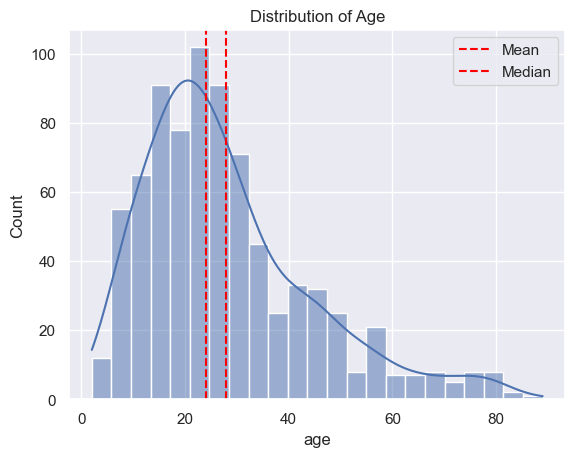

In [39]:
sns.set_theme(style = 'darkgrid')
sns.histplot(df['age'], kde = True)
plt.title("Distribution of Age")

age_mean = df['age'].mean()
age_median = df['age'].median()

print("Age Mean: ", age_mean)
print("Age Median: ", age_median)

plt.axvline(age_mean, color="red", linestyle = "--", label = "Mean")

plt.axvline(age_median, color="red", linestyle = "--", label = "Median")

plt.legend()
plt.show()

Result Mean:  8.537303106501248
Result Median:  9.605299308


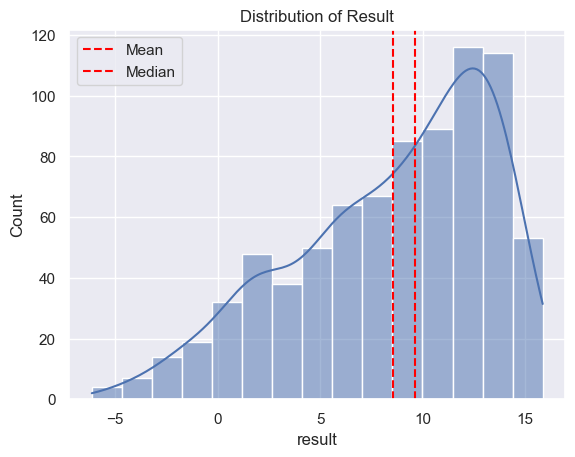

In [41]:
sns.histplot(df['result'], kde = True)
plt.title("Distribution of Result")

result_mean = df['result'].mean()
result_median = df['result'].median()

print("Result Mean: ", result_mean)
print("Result Median: ", result_median)

plt.axvline(result_mean, color="red", linestyle = "--", label = "Mean")

plt.axvline(result_median, color="red", linestyle = "--", label = "Median")

plt.legend()
plt.show()

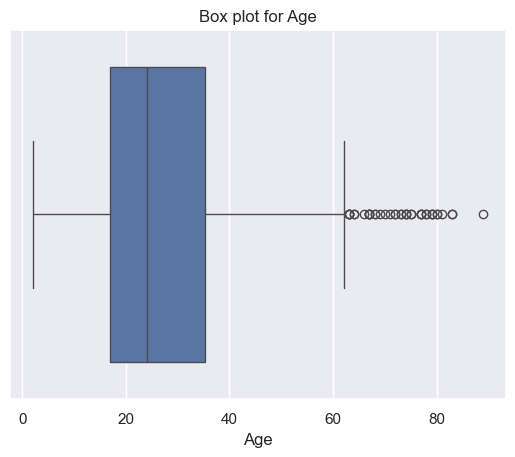

In [43]:
sns.boxplot(x = df['age'])
plt.title("Box plot for Age")
plt.xlabel("Age")
plt.show()


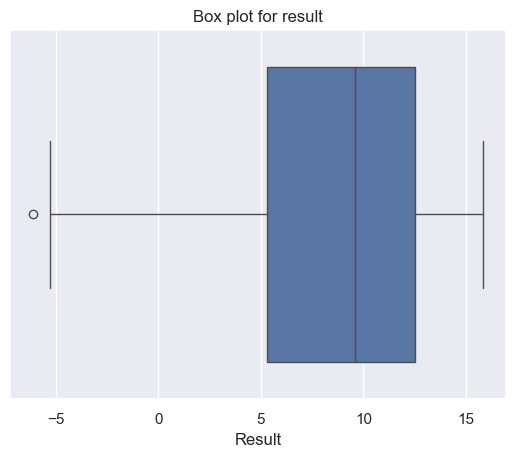

In [169]:
sns.boxplot(x = df['result'])
plt.title("Box plot for result")
plt.xlabel("Result")
plt.show()

In [171]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [173]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR  = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = df[(df['age']< lower_bound) | (df['age']> upper_bound)]

In [175]:
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  -10.375
Upper Bound:  62.625


In [177]:
len(age_outliers)

39

In [179]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR  = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

result_outliers = df[(df['result']< lower_bound) | (df['result']> upper_bound)]
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  -5.5052896818749995
Upper Bound:  23.326348605125


In [181]:
len(result_outliers)

1

In [183]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

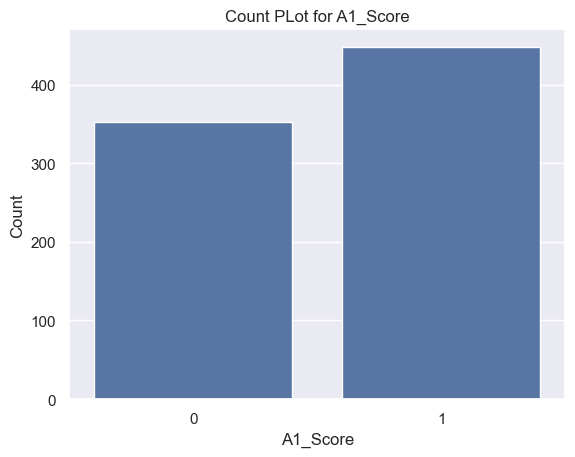

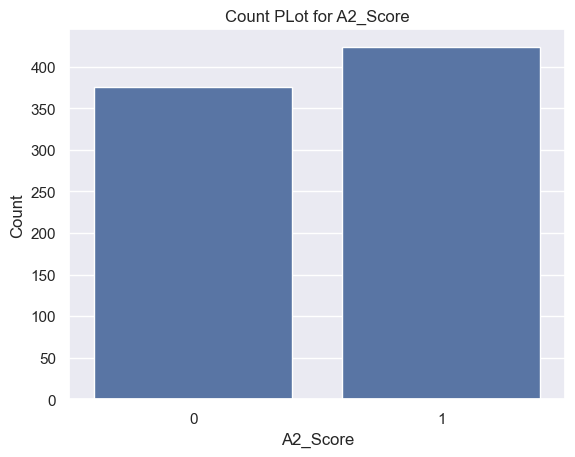

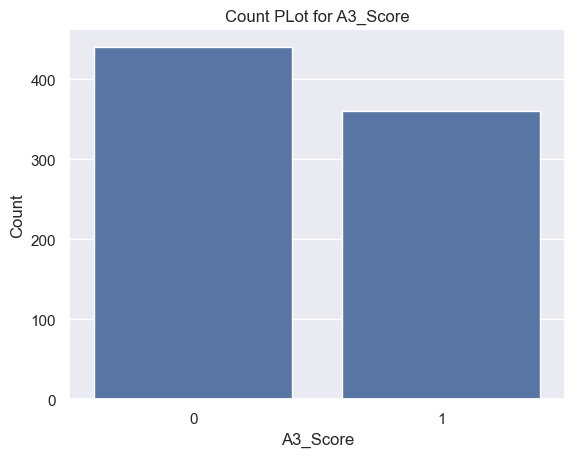

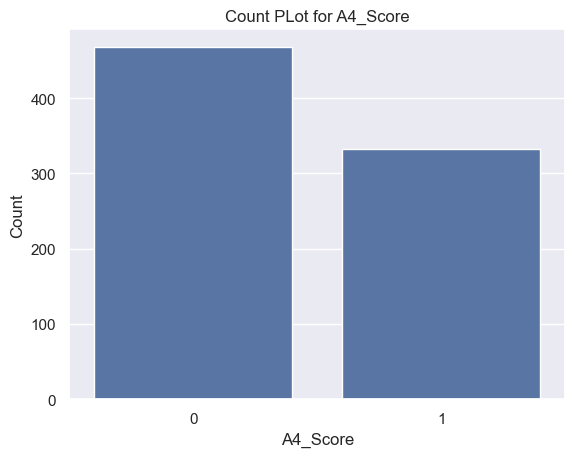

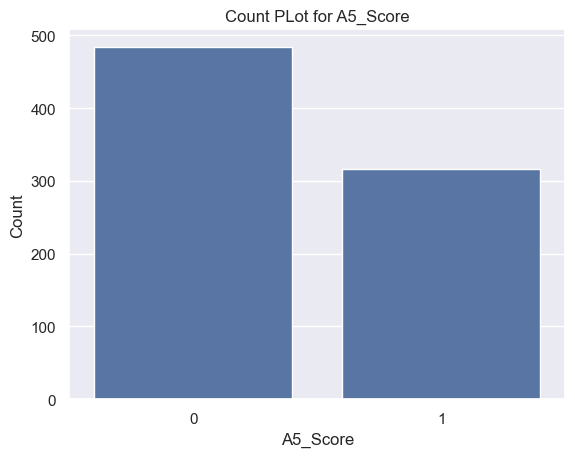

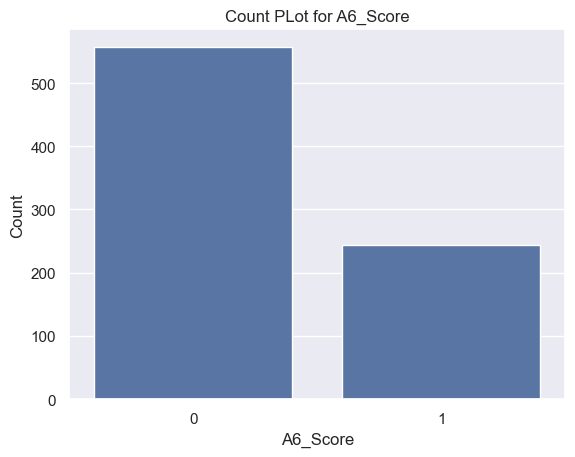

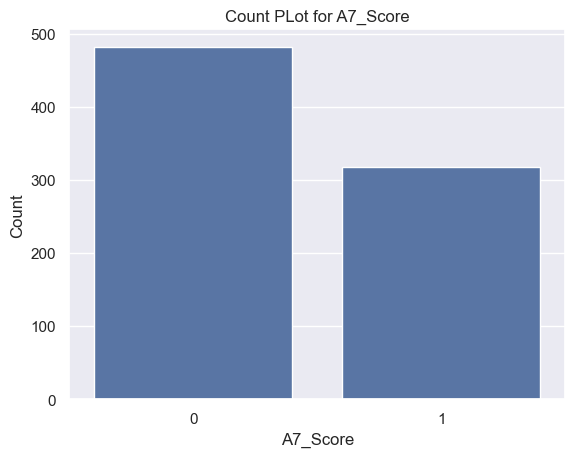

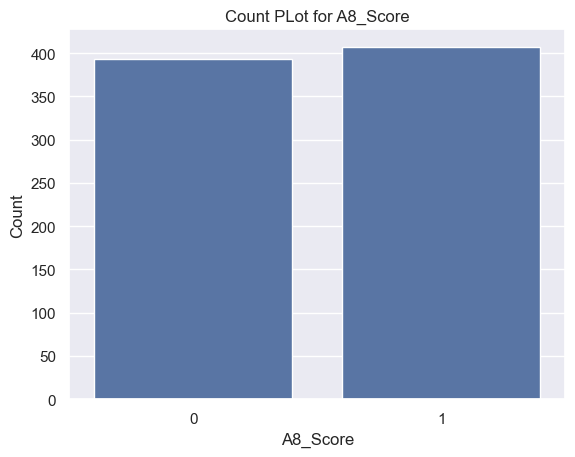

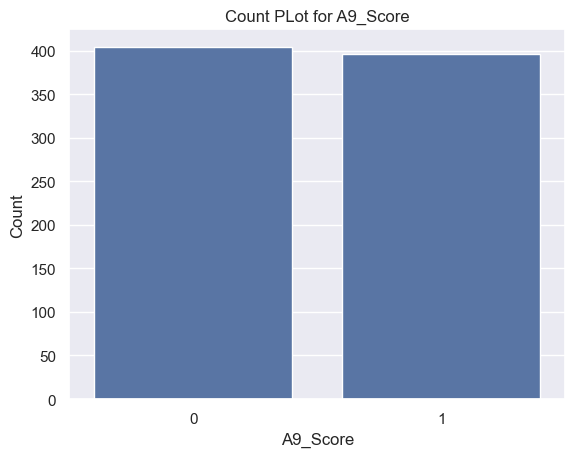

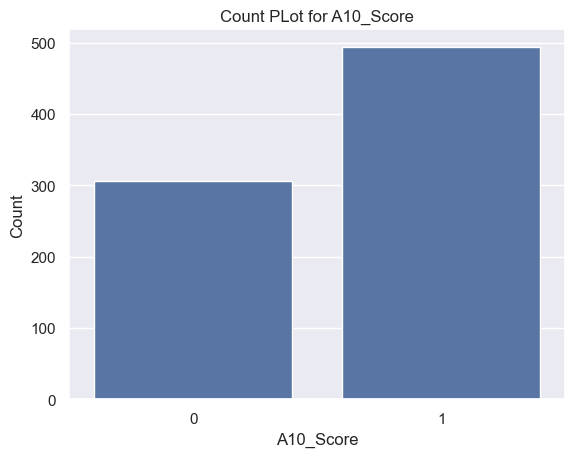

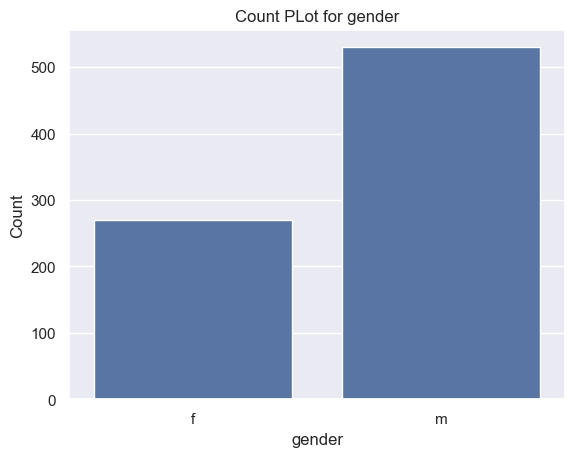

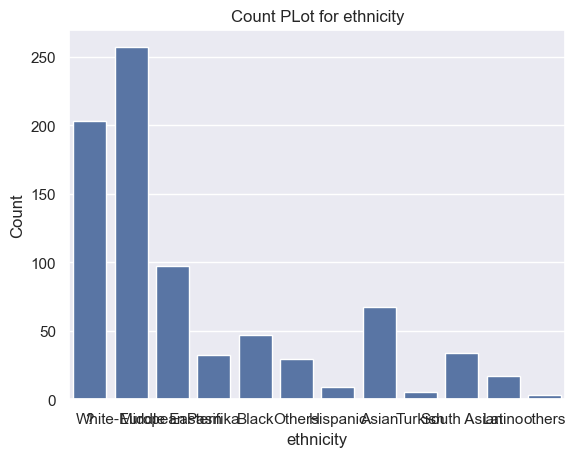

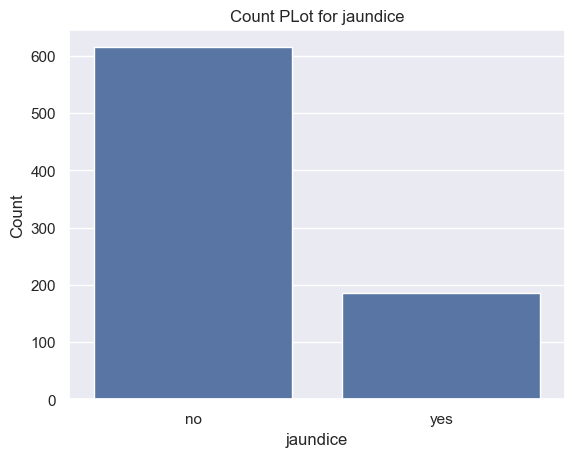

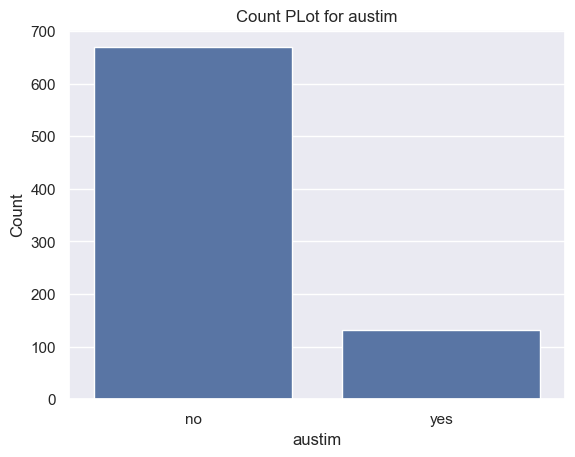

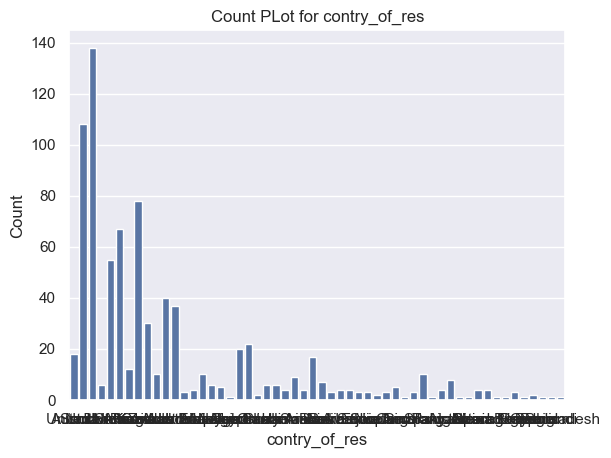

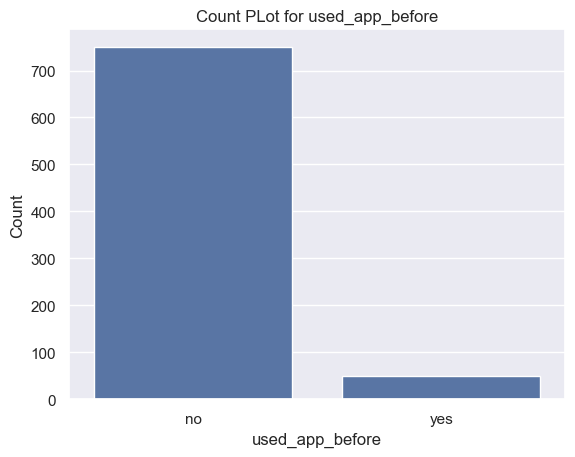

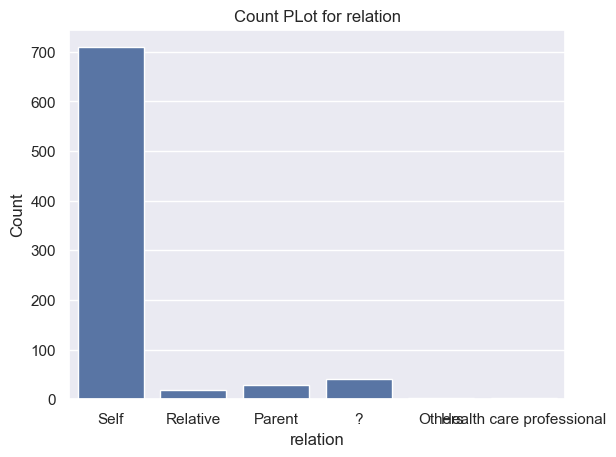

In [185]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']

for col in categorical_columns:
    sns.countplot(x = df[col])
    plt.title(f"Count PLot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

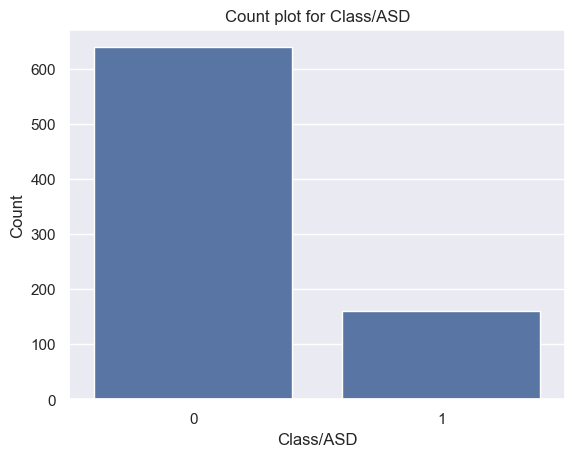

In [186]:
sns.countplot(x = df['Class/ASD'])
plt.title("Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()


In [187]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [188]:
for col in df.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, df[col].unique())
        print("--" * 20)


A1_Score [1 0]
----------------------------------------
A2_Score [0 1]
----------------------------------------
A3_Score [1 0]
----------------------------------------
A4_Score [0 1]
----------------------------------------
A5_Score [1 0]
----------------------------------------
A6_Score [0 1]
----------------------------------------
A7_Score [1 0]
----------------------------------------
A8_Score [0 1]
----------------------------------------
A9_Score [1 0]
----------------------------------------
A10_Score [1 0]
----------------------------------------
gender ['f' 'm']
----------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
----------------------------------------
jaundice ['no' 'yes']
----------------------------------------
austim ['no' 'yes']
----------------------------------------
contry_of_res ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 '

In [189]:
df['ethnicity'] = df['ethnicity'].replace({"?": "Others", "others": "Others"})
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [190]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [197]:
df['relation']  = df['relation'].replace(
{
    "?": "Others", 
    "Relative": "Others",
    "Parent": "Others", 
    "Health care professional": "Others"
})

In [199]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [201]:
object_columns = df.select_dtypes(include = ["object"]).columns

In [203]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [205]:
encoders = {}
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column]  = label_encoder.fit_transform(df[column])
    encoders[column]  = label_encoder
    
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

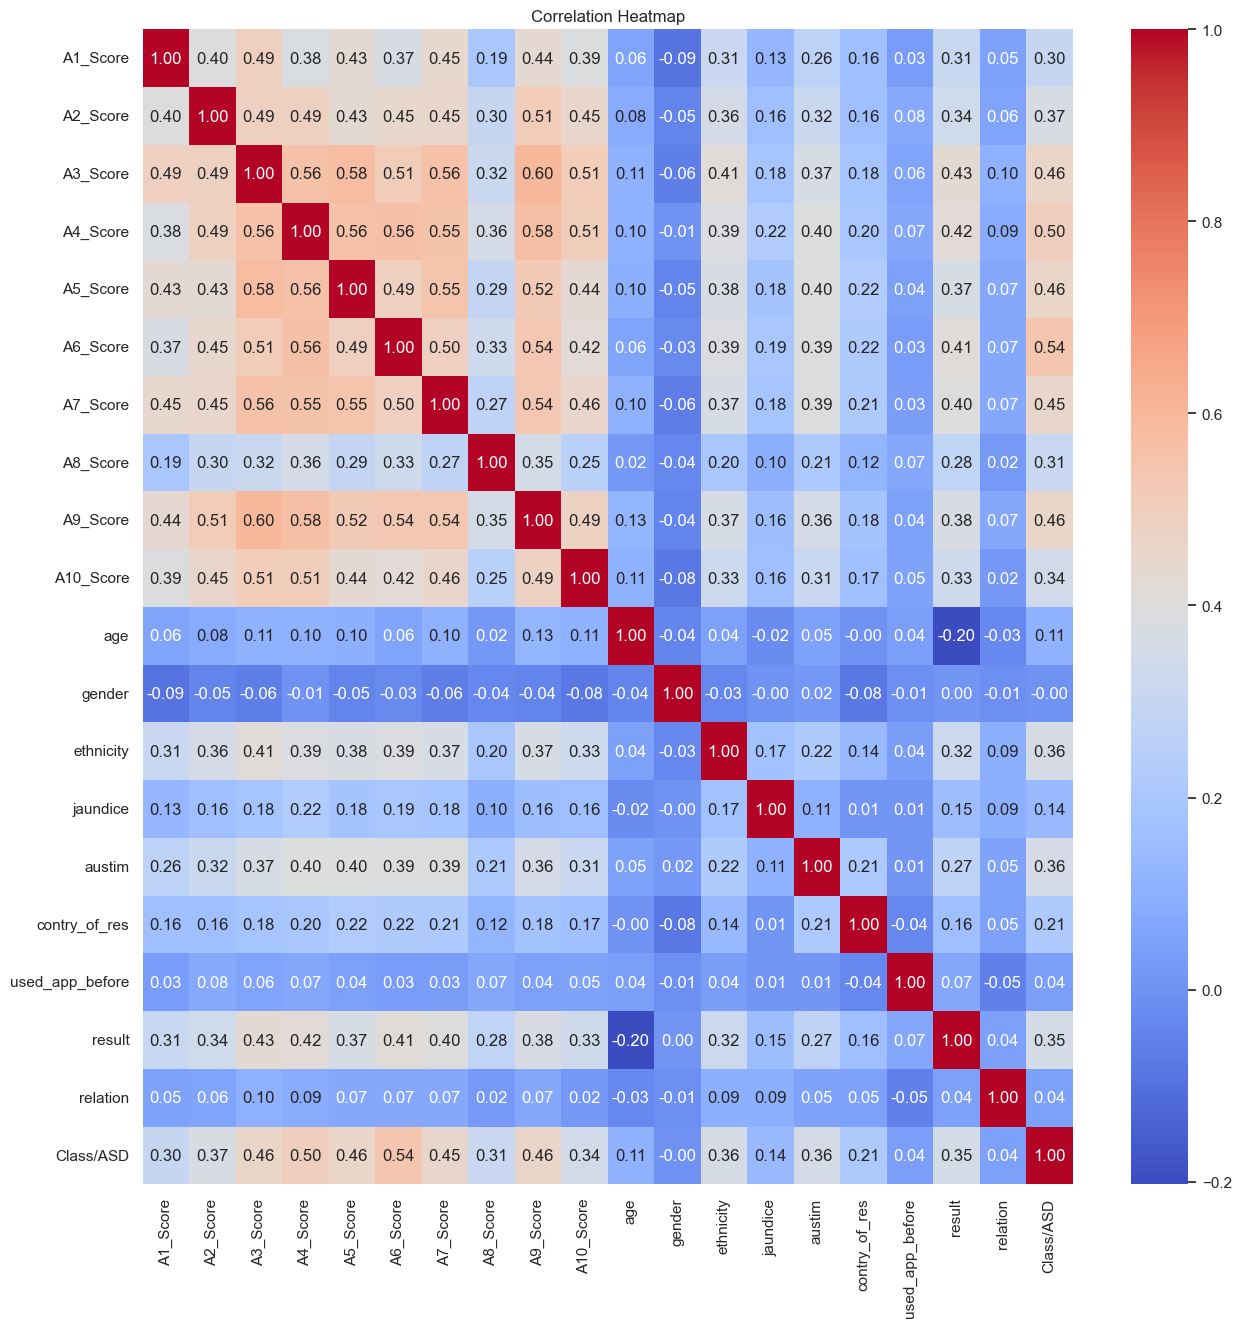

In [207]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [208]:
def replace_outlier_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR  = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median = df[column].median()

    df[column] = df[column].apply(lambda x : median if x < lower_bound or x > upper_bound else x)
    
    return df

In [209]:
df.shape

(800, 20)

In [210]:
df = replace_outlier_with_median(df, "age")
df = replace_outlier_with_median(df, "result")

In [215]:
df.shape

(800, 20)

In [217]:
X  = df.drop(columns = ['Class/ASD'])
y = df['Class/ASD']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

In [221]:
X_train.shape

(640, 19)

In [223]:
y_train.shape

(640,)

In [225]:
y_train.value_counts()

Class/ASD
0    511
1    129
Name: count, dtype: int64

In [227]:
smote = SMOTE(random_state=42)

In [229]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [231]:
y_train_smote.shape

(1022,)

In [233]:
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=200,random_state=42),
    "XGBClassifier": XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=6,random_state=42,eval_metric="logloss")
}

In [235]:
cv_scores = {}

for model_name, model in models.items():
    print(f"Trainig {model_name} with default parameters....")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring = "accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} Cross validation Accuarcy: {np.mean(scores): .2f}")
    print("--"* 20)

Trainig DecisionTreeClassifier with default parameters....
DecisionTreeClassifier Cross validation Accuarcy:  0.86
----------------------------------------
Trainig RandomForestClassifier with default parameters....
RandomForestClassifier Cross validation Accuarcy:  0.91
----------------------------------------
Trainig XGBClassifier with default parameters....
XGBClassifier Cross validation Accuarcy:  0.91
----------------------------------------


In [236]:
cv_scores

{'DecisionTreeClassifier': array([0.83902439, 0.87804878, 0.89215686, 0.87745098, 0.83823529]),
 'RandomForestClassifier': array([0.87804878, 0.89756098, 0.94117647, 0.92156863, 0.92647059]),
 'XGBClassifier': array([0.85853659, 0.89756098, 0.92647059, 0.93137255, 0.91666667])}

In [237]:
(0.7961165 + 0.87864078 + 0.87378641 + 0.8592233 + 0.87378641)/5

0.85631068

In [240]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42,)
xgboost_classifier = XGBClassifier(random_state = 42)

In [58]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth" : [None, 10, 20, 30, 50 ,70],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
    
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth" : [3,5,7,10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample" : [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

In [242]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter = 20, cv = 5, scoring = "accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter = 20, cv = 5, scoring = "accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter = 20, cv = 5, scoring = "accuracy", random_state=42)


NameError: name 'param_grid_dt' is not defined

In [244]:
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

NameError: name 'random_search_dt' is not defined

In [61]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_
    
if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [62]:
best_model

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)

In [63]:
best_score

0.9271844660194175

In [64]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
y_test_pred =best_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.81875

In [65]:
confusion_matrix(y_test, y_test_pred)

array([[108,  16],
       [ 13,  23]], dtype=int64)

In [66]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160



In [67]:
from xgboost import XGBClassifier
import joblib
model = XGBClassifier()
model.fit(X_train, y_train)
joblib.dump(model, 'autism_model.pkl')

['autism_model.pkl']

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train XGBoost on balanced data
model = XGBClassifier()
model.fit(X_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
# train_autism_rf.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report
import joblib

# -------- 1. Load data ------------------------------------------------------
df = pd.read_csv("train.csv")

# -------- 2. Basic cleaning -------------------------------------------------
# Replace ? with NA, drop rows that still contain NA
df = df.replace("?", pd.NA).dropna()

# Drop columns that are NOT going into the model
df = df.drop(columns=["ID", "result"], errors="ignore")  # keep contry_of_res

# -------- 3. Encode categorical columns ------------------------------------
df["gender"]          = df["gender"].map({"m": 1, "f": 0})
df["jaundice"]        = df["jaundice"].map({"yes": 1, "no": 0})
df["austim"]          = df["austim"].map({"yes": 1, "no": 0})
df["used_app_before"] = df["used_app_before"].map({"yes": 1, "no": 0})

# Turn multi-category columns into numeric codes
for col in ["ethnicity", "contry_of_res", "age_desc", "relation"]:
    df[col] = df[col].astype("category").cat.codes

# -------- 4. Define feature list (19 columns!) ------------------------------
feature_cols = [
    "A1_Score", "A2_Score", "A3_Score", "A4_Score", "A5_Score",
    "A6_Score", "A7_Score", "A8_Score", "A9_Score", "A10_Score",  # 10
    "gender", "ethnicity", "jaundice", "austim", "used_app_before",  # +5 = 15
    "age", "age_desc", "relation", "contry_of_res"                   # +4 = 19
]

X = df[feature_cols]
y = df["Class/ASD"]          # 0 = Negative, 1 = Positive

# -------- 5. Handle class imbalance (simple up-sampling) --------------------
data = pd.concat([X, y], axis=1)
maj = data[data["Class/ASD"] == 0]
min_ = data[data["Class/ASD"] == 1]

min_up = resample(min_,
                  replace=True,
                  n_samples=len(maj),
                  random_state=42)

balanced = pd.concat([maj, min_up])

X_bal = balanced[feature_cols]
y_bal = balanced["Class/ASD"]

# -------- 6. Train / evaluate ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight=None,      # already balanced
    random_state=42
)
rf.fit(X_train, y_train)

print("\n=== Evaluation on held-out test split ===")
print(classification_report(y_test, rf.predict(X_test)))

# -------- 7. Save model & feature order ------------------------------------
joblib.dump(rf, "autism_rf_19f.pkl")
with open("feature_order.txt", "w") as f:
    for col in feature_cols:
        f.write(col + "\n")

print("\n✅  Model saved to  autism_rf_19f.pkl")
print("✅  Feature order saved to feature_order.txt")



=== Evaluation on held-out test split ===
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        82
           1       0.91      0.98      0.94        83

    accuracy                           0.94       165
   macro avg       0.94      0.94      0.94       165
weighted avg       0.94      0.94      0.94       165


✅  Model saved to  autism_rf_19f.pkl
✅  Feature order saved to feature_order.txt


In [147]:
print("Counts after balancing:", balanced["Class/ASD"].value_counts())

Counts after balancing: Class/ASD
0    411
1    411
Name: count, dtype: int64


In [149]:
min_up = resample(min_,
                  replace=True,
                  n_samples=len(maj),
                  random_state=42)

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
import joblib

# 1. Load Dataset
df = pd.read_csv("train.csv")

# 2. Drop Unused/Irrelevant Columns
df = df.drop(columns=["ID"])

# 3. Encode Categorical Variables
df['gender'] = df['gender'].map({'m': 1, 'f': 0})
df['jaundice'] = df['jaundice'].map({'yes': 1, 'no': 0})
df['austim'] = df['austim'].map({'yes': 1, 'no': 0})
df['used_app_before'] = df['used_app_before'].map({'yes': 1, 'no': 0})
df['age_desc'] = df['age_desc'].map({'18 and more': 1, 'Less than 18': 0})
df['relation'] = df['relation'].astype('category').cat.codes
df['ethnicity'] = df['ethnicity'].astype('category').cat.codes
df['contry_of_res'] = df['contry_of_res'].astype('category').cat.codes

# 4. Handle Missing / Unknowns
df = df.replace("?", np.nan)
df = df.dropna()

# 5. Define Features and Target
X = df.drop(columns=["Class/ASD", "result"])  # remove redundant target if present
y = df["Class/ASD"]

# 6. Balance the Dataset
data = pd.concat([X, y], axis=1)
autistic = data[data["Class/ASD"] == 1]
non_autistic = data[data["Class/ASD"] == 0]

autistic_upsampled = resample(autistic,
                              replace=True,
                              n_samples=len(non_autistic),
                              random_state=42)

balanced_data = pd.concat([non_autistic, autistic_upsampled])
X_bal = balanced_data.drop("Class/ASD", axis=1)
y_bal = balanced_data["Class/ASD"]

# 7. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# 8. Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 10. Save Model
joblib.dump(model, "autism_rf_19f.pkl")
print("✅ Model saved as autism_rf_19f.pkl")


Accuracy: 0.94921875
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       132
           1       0.92      0.98      0.95       124

    accuracy                           0.95       256
   macro avg       0.95      0.95      0.95       256
weighted avg       0.95      0.95      0.95       256

✅ Model saved as autism_rf_19f.pkl


In [9]:
print(df.columns)


Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [3]:
pip install imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load and clean data as shown earlier
df = pd.read_csv("train.csv")
df = df.replace('?', pd.NA).dropna()
binary_map = {'yes': 1, 'no': 0, 'f': 0, 'm': 1}
df['gender'] = df['gender'].map(binary_map)
df['jaundice'] = df['jaundice'].map(binary_map)
df['austim'] = df['austim'].map(binary_map)
df['used_app_before'] = df['used_app_before'].map(binary_map)
df['age_desc'] = df['age_desc'].apply(lambda x: 1 if x.strip().lower() == "18 and more" else 0)

from sklearn.preprocessing import LabelEncoder
for col in ['ethnicity', 'relation', 'contry_of_res']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
X = df[[
    'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
    'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
    'gender', 'ethnicity', 'jaundice', 'austim', 'used_app_before',
    'age', 'age_desc', 'relation', 'contry_of_res'
]]
y = df['Class/ASD']

# Apply SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train calibrated model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
calibrated_rf = CalibratedClassifierCV(rf, method='sigmoid', cv=5)
calibrated_rf.fit(X_train, y_train)

# Prediction
y_proba = calibrated_rf.predict_proba(X_test)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")


ROC AUC Score: 0.92


In [11]:
from sklearn.ensemble import RandomForestClassifier
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and clean data
df = pd.read_csv("train.csv")
df = df.replace('?', pd.NA).dropna()
binary_map = {'yes': 1, 'no': 0, 'f': 0, 'm': 1}
df['gender'] = df['gender'].map(binary_map)
df['jaundice'] = df['jaundice'].map(binary_map)
df['austim'] = df['austim'].map(binary_map)
df['used_app_before'] = df['used_app_before'].map(binary_map)
df['age_desc'] = df['age_desc'].apply(lambda x: 1 if x.strip().lower() == "18 and more" else 0)

for col in ['ethnicity', 'relation', 'contry_of_res']:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df[[
    'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
    'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
    'gender', 'ethnicity', 'jaundice', 'austim', 'used_app_before',
    'age', 'age_desc', 'relation', 'contry_of_res'
]]
y = df['Class/ASD']

# Apply SMOTE to balance
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Save model
joblib.dump(model, 'autism_rf_highprob.pkl')
print("✅ Model saved as autism_rf_highprob.pkl")


✅ Model saved as autism_rf_highprob.pkl


In [246]:
# ---------------------------------------------------
# FINAL MODEL TRAINING & COMPARISON (STABLE VERSION)
# ---------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# -------------------------------
# Decision Tree
# -------------------------------
dt = DecisionTreeClassifier(
    random_state=42
)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Performance")
print("Accuracy :", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall   :", recall_score(y_test, dt_pred))
print("F1 Score :", f1_score(y_test, dt_pred))
print("-" * 40)

# -------------------------------
# Random Forest (FINAL MODEL)
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Performance")
print("Accuracy :", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall   :", recall_score(y_test, rf_pred))
print("F1 Score :", f1_score(y_test, rf_pred))
print("-" * 40)

# -------------------------------
# XGBoost
# -------------------------------
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost Performance")
print("Accuracy :", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall   :", recall_score(y_test, xgb_pred))
print("F1 Score :", f1_score(y_test, xgb_pred))
print("-" * 40)

# -------------------------------
# SAVE FINAL DEPLOYED MODEL
# -------------------------------
joblib.dump(rf, "autism_rf_stable.pkl")

print("✅ Final Random Forest model saved as autism_rf_stable.pkl")


Decision Tree Performance
Accuracy : 0.775
Precision: 0.42857142857142855
Recall   : 0.375
F1 Score : 0.4
----------------------------------------
Random Forest Performance
Accuracy : 0.85
Precision: 0.625
Recall   : 0.625
F1 Score : 0.625
----------------------------------------
XGBoost Performance
Accuracy : 0.83125
Precision: 0.5757575757575758
Recall   : 0.59375
F1 Score : 0.5846153846153846
----------------------------------------
✅ Final Random Forest model saved as autism_rf_stable.pkl


In [250]:
# ============================================
# FINAL STABLE MODEL TRAINING (NO RANDOM ISSUES)
# ============================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import numpy as np

# -----------------------------
# Fix global randomness
# -----------------------------
np.random.seed(42)

# -----------------------------
# Re-train Random Forest safely
# -----------------------------
final_rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    bootstrap=True
)

final_rf.fit(X_train, y_train)

# -----------------------------
# Evaluation
# -----------------------------
y_pred = final_rf.predict(X_test)

print("FINAL RANDOM FOREST PERFORMANCE")
print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall   :", round(recall_score(y_test, y_pred), 3))
print("F1 Score :", round(f1_score(y_test, y_pred), 3))

# -----------------------------
# Probability sanity check
# -----------------------------
probs = final_rf.predict_proba(X_test)[:, 1]
print("\nSample Probabilities:", np.round(probs[:10] * 100, 2))

# -----------------------------
# Save FINAL model for app.py
# -----------------------------
joblib.dump(final_rf, "autism_rf_highprob7.pkl")

print("\n✅ Final stable model saved as autism_rf_highprob7.pkl")


FINAL RANDOM FOREST PERFORMANCE
Accuracy : 0.85
Precision: 0.618
Recall   : 0.656
F1 Score : 0.636

Sample Probabilities: [ 0.    1.9   0.    2.8   4.39 58.44  7.78  4.03  9.54 48.25]

✅ Final stable model saved as autism_rf_highprob7.pkl


In [252]:
# ============================================
# FINAL SCREENING-BASED PREDICTION LOGIC
# ============================================

import numpy as np

# Check probability distribution
probs = final_rf.predict_proba(X_test)[:, 1]

print("Probability Statistics")
print("Min:", round(probs.min()*100, 2), "%")
print("Max:", round(probs.max()*100, 2), "%")
print("Mean:", round(probs.mean()*100, 2), "%")

# Custom screening threshold
THRESHOLD = 0.35   # medically reasonable for early screening

screening_pred = (probs >= THRESHOLD).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nSCREENING-BASED PERFORMANCE (Threshold = 35%)")
print("Accuracy :", round(accuracy_score(y_test, screening_pred), 3))
print("Precision:", round(precision_score(y_test, screening_pred), 3))
print("Recall   :", round(recall_score(y_test, screening_pred), 3))
print("F1 Score :", round(f1_score(y_test, screening_pred), 3))


Probability Statistics
Min: 0.0 %
Max: 90.75 %
Mean: 21.8 %

SCREENING-BASED PERFORMANCE (Threshold = 35%)
Accuracy : 0.825
Precision: 0.548
Recall   : 0.719
F1 Score : 0.622
